PREPROCESADO

In [82]:
pip install scikit-learn

Note: you may need to restart the kernel to use updated packages.


In [83]:
# Librerías básicas
import pandas as pd
import numpy as np

# Librerías de visualización
import matplotlib.pyplot as plt
import seaborn as sns

# Librerías de Machine Learning
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error as mae
from sklearn.metrics import mean_squared_error as mse
from sklearn.metrics import r2_score as r2
from sklearn.neighbors import KNeighborsRegressor

In [84]:
df = pd.read_csv("kc_house_data.csv")
df.head().T

,0,1,2,3,4
id,7129300520,6414100192,5631500400,2487200875,1954400510
date,20141013T000000,20141209T000000,20150225T000000,20141209T000000,20150218T000000
price,221900.0,538000.0,180000.0,604000.0,510000.0
bedrooms,3,3,2,4,3
bathrooms,1.0,2.25,1.0,3.0,2.0
sqft_living,1180,2570,770,1960,1680
sqft_lot,5650,7242,10000,5000,8080
floors,1.0,2.0,1.0,1.0,1.0
waterfront,0,0,0,0,0
view,0,0,0,0,0


1.Quito columnas que no me aportan nada

In [85]:
df = df.drop(['id', 'date',"lat","long"], axis=1)

In [86]:
df.head().T

,0,1,2,3,4
price,221900.0,538000.00,180000.0,604000.0,510000.0
bedrooms,3.0,3.00,2.0,4.0,3.0
bathrooms,1.0,2.25,1.0,3.0,2.0
sqft_living,1180.0,2570.00,770.0,1960.0,1680.0
sqft_lot,5650.0,7242.00,10000.0,5000.0,8080.0
floors,1.0,2.00,1.0,1.0,1.0
waterfront,0.0,0.00,0.0,0.0,0.0
view,0.0,0.00,0.0,0.0,0.0
condition,3.0,3.00,3.0,5.0,3.0
grade,7.0,7.00,6.0,7.0,8.0


2.Hemos visto que no hay nulos.

In [87]:
df.isnull().sum()

price            0
bedrooms         0
bathrooms        0
sqft_living      0
sqft_lot         0
floors           0
waterfront       0
view             0
condition        0
grade            0
sqft_above       0
sqft_basement    0
yr_built         0
yr_renovated     0
zipcode          0
sqft_living15    0
sqft_lot15       0
dtype: int64

3. No hay variables categóricas

In [88]:
df.dtypes

price            float64
bedrooms           int64
bathrooms        float64
sqft_living        int64
sqft_lot           int64
floors           float64
waterfront         int64
view               int64
condition          int64
grade              int64
sqft_above         int64
sqft_basement      int64
yr_built           int64
yr_renovated       int64
zipcode            int64
sqft_living15      int64
sqft_lot15         int64
dtype: object

4.OUTLIERS

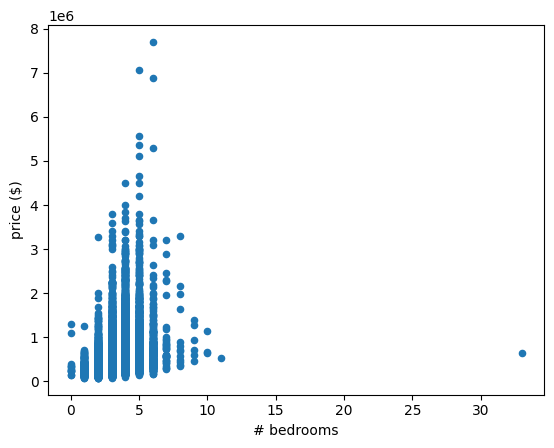

In [89]:
df.plot(kind = 'scatter',x='bedrooms',y = 'price')
plt.xlabel('# bedrooms')
plt.ylabel('price ($)')
plt.show()

In [90]:
df["bedrooms"].value_counts()

bedrooms
3     9824
4     6882
2     2760
5     1601
6      272
1      199
7       38
0       13
8       13
9        6
10       3
11       1
33       1
Name: count, dtype: int64

Para mas de 6 habitaciones, empieza a ser una anomalia

In [91]:
df_filtered = df[df['bedrooms'] <= 6]

In [92]:
df_filtered['bedrooms'].value_counts()

bedrooms
3    9824
4    6882
2    2760
5    1601
6     272
1     199
0      13
Name: count, dtype: int64

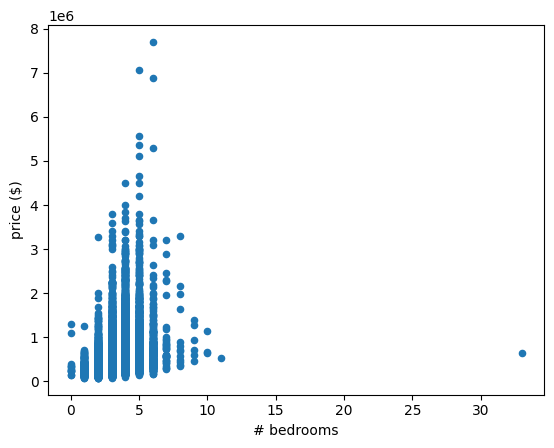

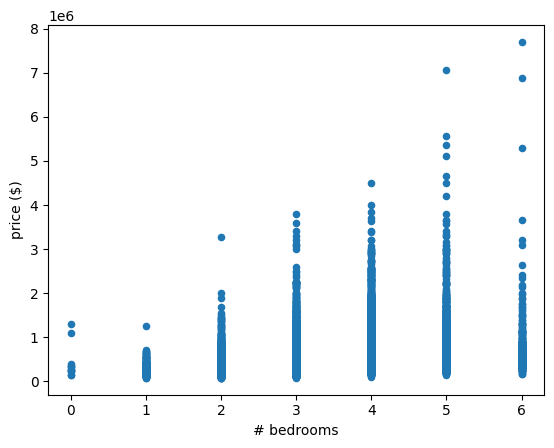

In [93]:
df.plot(kind = 'scatter',x='bedrooms',y = 'price')
plt.xlabel('# bedrooms')
plt.ylabel('price ($)')
plt.show()

df_filtered.plot(kind = 'scatter',x='bedrooms',y = 'price')
plt.xlabel('# bedrooms')
plt.ylabel('price ($)')
plt.show()

In [94]:
print(f'Original: {df.shape[0]}\nFiltered: {df_filtered.shape[0]}')
print(f'Diferencia: {(df.shape[0] - df_filtered.shape[0])/df.shape[0]*100}%')

Original: 21613
Filtered: 21551
Diferencia: 0.2868643871743858%


La diferencia de datos no es muy grande, lo aceptamos

In [95]:
df = df_filtered

5.Quito variables muy correlacionadas.
En el EDA hemos visto que estan intimamente relacionados sqft_above y sqft_living, puedo eliminar uno de ellos.

In [96]:
df = df.drop(['sqft_above'], axis=1)

PREPARO LOS DATOS

In [97]:
y = df["price"]
X = df.drop(columns="price")

In [98]:
scaler = MinMaxScaler()
X = scaler.fit_transform(X)

In [99]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

PRUEBO MODELOS, mi problema es de regresión.

a)Regresión lineal

In [100]:
model = LinearRegression()

model = model.fit(X_train, y_train)

In [101]:
# Esta función entrena el modelo y redondea los resultados
def pred(model, data_to_pred):
    y_pred = model.predict(data_to_pred)
    y_pred = np.rint(y_pred)
    return y_pred

In [102]:
# Esta función evalúa las principales métricas de problemas de regresión
def test(y_pred, y_true):
    train_mae = mae(y_true, y_pred)
    train_mse = mse(y_true, y_pred)
    train_rmse = np.sqrt(train_mse)
    train_r2 = r2(y_true, y_pred)
    
    
    print(f"MAE: {train_mae}")
    print(f"MSE: {train_mse}")
    print(f"RMSE: {train_rmse}")
    print(f"R2: {train_r2}")

In [103]:
# Esta función agrupa las dos anteriores para facilitar su uso
def pred_test(model, data_to_pred, y_true):
    y_pred = pred(model, data_to_pred)
    test(y_pred, y_true)

In [104]:
pred_test(model, X_train, y_train)

MAE: 139369.05440835268
MSE: 46321387693.695595
RMSE: 215224.04069642312
R2: 0.6521904695580312


In [105]:
pred_test(model, X_test, y_test)

MAE: 137881.47320807236
MSE: 45167564035.31593
RMSE: 212526.61959226645
R2: 0.6610440047765687


Encontramos un MSE enorme, este no es un buen modelo para mi problema y el R2 es alto

b)Regresión logística

No aplica

c)Árbol de decisión

best mean cross-validation score: 0.703
best parameters: {'max_depth': 9}


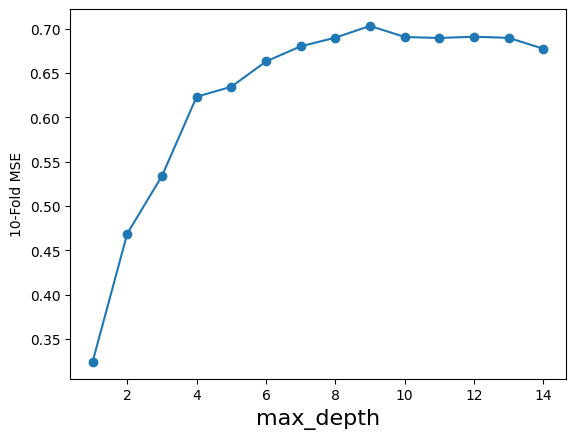

In [106]:
#IMPORTAMOS DECISSIONTREEREGRESSOR

from sklearn.tree import DecisionTreeRegressor
#LE APLICAMOS CROSS VALIDATION
from sklearn.model_selection import GridSearchCV
from sklearn import tree


maxDepth = range(1,15)
param_grid = {'max_depth': maxDepth }
grid = GridSearchCV(DecisionTreeRegressor(random_state=0), param_grid=param_grid, cv = 10)
grid.fit(X_train, y_train)
print("best mean cross-validation score: {:.3f}".format(grid.best_score_))
print("best parameters: {}".format(grid.best_params_))

scores = np.array(grid.cv_results_['mean_test_score'])
plt.plot(maxDepth,scores,'-o')
plt.xlabel('max_depth',fontsize=16)
plt.ylabel('10-Fold MSE')
#plt.ylim((-1, 0))
plt.show()

Encontramos el máximo en 9.

In [107]:
maxDepthOptimo = 9 #grid.best_params_['max_depth']
treeModel = DecisionTreeRegressor(max_depth=maxDepthOptimo).fit(X_train,y_train)

print("Train: ",treeModel.score(X_train,y_train))
print("Test: ",treeModel.score(X_test,y_test))

Train:  0.8300675753625182
Test:  0.7161742548591339


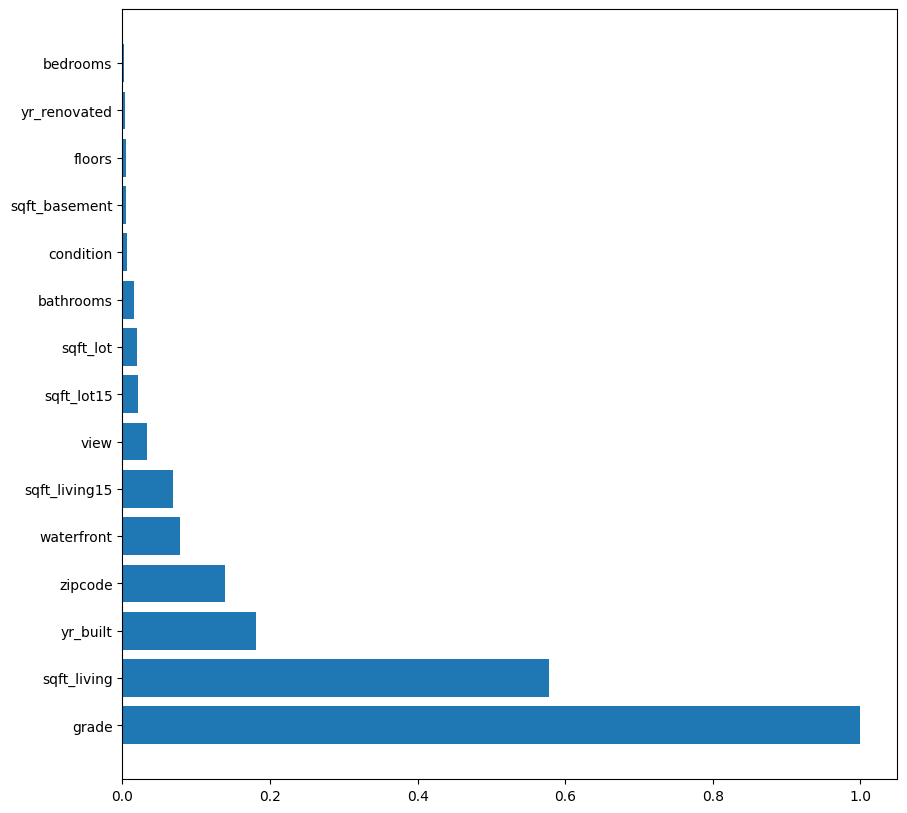

In [111]:
importances = treeModel.feature_importances_
importances = importances / np.max(importances)

indices = np.argsort(importances)[::-1]

plt.figure(figsize=(10,10))
plt.barh(range(X_train.shape[1]),importances[indices])
plt.yticks(range(X_train.shape[1]),feature_names[indices])
plt.show()

Las variables que más peso tienen sobre el precio son grade y sqft_living

d)Naive Bayes

In [113]:
from sklearn.naive_bayes import GaussianNB

In [114]:
model = GaussianNB()
model.fit(X_train, y_train)

GaussianNB()

In [115]:
y_pred = model.predict(X_test)

In [117]:
from sklearn.metrics import accuracy_score

In [118]:
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

Accuracy: 0.0006958942240779402


In [ ]:
Accuracy horrible!!!!!!!

e)KNN

In [108]:
model = KNeighborsRegressor()

model = model.fit(X_train, y_train)

In [109]:
pred_test(model, X_train, y_train)

MAE: 94877.71496519721
MSE: 27332138981.090256
RMSE: 165324.344792563
R2: 0.7947734535103


In [110]:
pred_test(model, X_test, y_test)

MAE: 118174.17211783808
MSE: 41891229951.50359
RMSE: 204673.47153821276
R2: 0.6856309645513918


El MSE es muy grande y R2 es muy alto

f)SVM

In [120]:
from sklearn.svm import SVC

In [121]:
model = SVC(kernel='linear', C=1.0)
model.fit(X_train, y_train)

SVC(kernel='linear')

In [ ]:
y_pred = model.predict(X_test)

In [ ]:
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)